<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducion" data-toc-modified-id="Introducion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducion</a></span></li><li><span><a href="#Analis-de-datos" data-toc-modified-id="Analis-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analis de datos</a></span><ul class="toc-item"><li><span><a href="#Carga-de-datasets-e-importacion-de-librerias" data-toc-modified-id="Carga-de-datasets-e-importacion-de-librerias-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Carga de datasets e importacion de librerias</a></span></li><li><span><a href="#Estudio-de-datos" data-toc-modified-id="Estudio-de-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Estudio de datos</a></span></li></ul></li><li><span><a href="#Construir-un-modelo-para-predecir-la-cancelación-de-usuarios" data-toc-modified-id="Construir-un-modelo-para-predecir-la-cancelación-de-usuarios-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Construir un modelo para predecir la cancelación de usuarios</a></span><ul class="toc-item"><li><span><a href="#Modelo-regresión-logística" data-toc-modified-id="Modelo-regresión-logística-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modelo regresión logística</a></span></li><li><span><a href="#Modelo-bosque-aleatorio." data-toc-modified-id="Modelo-bosque-aleatorio.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modelo bosque aleatorio.</a></span></li></ul></li><li><span><a href="#Crear-clústeres-de-usuarios/as" data-toc-modified-id="Crear-clústeres-de-usuarios/as-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Crear clústeres de usuarios/as</a></span><ul class="toc-item"><li><span><a href="#Estandariza-los-datos." data-toc-modified-id="Estandariza-los-datos.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Estandariza los datos.</a></span></li><li><span><a href="#Dendrograma" data-toc-modified-id="Dendrograma-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Dendrograma</a></span></li><li><span><a href="#Algortimo-K-means" data-toc-modified-id="Algortimo-K-means-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Algortimo K-means</a></span></li><li><span><a href="#Valores-medios-de-característica-para-los-clústeres" data-toc-modified-id="Valores-medios-de-característica-para-los-clústeres-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Valores medios de característica para los clústeres</a></span></li><li><span><a href="#Distribuciones-de-características-para-los-clústeres" data-toc-modified-id="Distribuciones-de-características-para-los-clústeres-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Distribuciones de características para los clústeres</a></span></li><li><span><a href="#Tasa-de-cancelación-para-cada-clúster" data-toc-modified-id="Tasa-de-cancelación-para-cada-clúster-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Tasa de cancelación para cada clúster</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Introducion

El presente proyecto se realiza con el objectivo de pronosticar la rentencion y permanencia de los ussuario en la cadena de gimnasios Model Fitness

# Analis de datos

## Carga de datasets e importacion de librerias

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
gym_data= pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Estudio de datos

In [4]:
gym_data.columns=['gender','near_location','partner','promo_friends','phone','contract_period','group_visits','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frecuency_total','avg_frecuency_current_month','churn']

In [5]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frecuency_total,avg_frecuency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
gym_data.dtypes

gender                            int64
near_location                     int64
partner                           int64
promo_friends                     int64
phone                             int64
contract_period                   int64
group_visits                      int64
age                               int64
avg_additional_charges_total    float64
month_to_end_contract           float64
lifetime                          int64
avg_class_frecuency_total       float64
avg_frecuency_current_month     float64
churn                             int64
dtype: object

In [7]:
gym_data.isna().sum()

gender                          0
near_location                   0
partner                         0
promo_friends                   0
phone                           0
contract_period                 0
group_visits                    0
age                             0
avg_additional_charges_total    0
month_to_end_contract           0
lifetime                        0
avg_class_frecuency_total       0
avg_frecuency_current_month     0
churn                           0
dtype: int64

In [8]:
gym_data.duplicated().sum()

0

In [9]:
gym_data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frecuency_total,avg_frecuency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


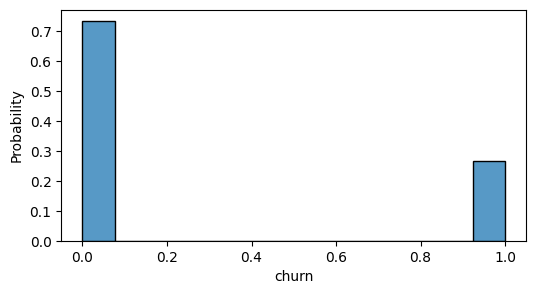

In [10]:
plt.figure(figsize=(6, 3))
sns.histplot(data=gym_data, x='churn', ax=plt.gca(), stat='probability', common_norm=False)
plt.show()

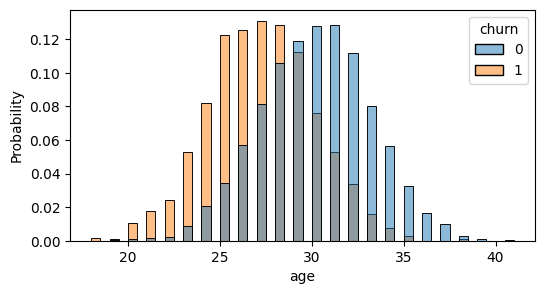

In [11]:
plt.figure(figsize=(6, 3))
sns.histplot(data=gym_data, x='age', hue='churn', ax=plt.gca(), stat='probability', common_norm=False)
plt.show()

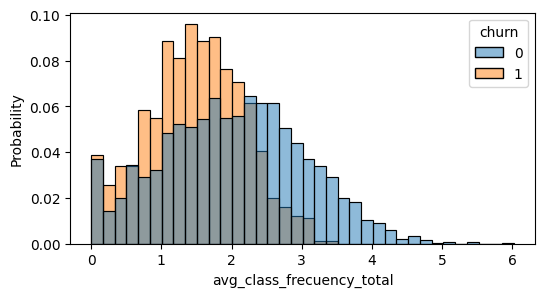

In [12]:
plt.figure(figsize=(6, 3))
sns.histplot(data=gym_data, x='avg_class_frecuency_total', hue='churn', ax=plt.gca(), stat='probability', common_norm=False)
plt.show()

Nota: La cancelacion es mas comun en usuarios menores de 30 años y que van al menos dos veces a la semana. 

<AxesSubplot:>

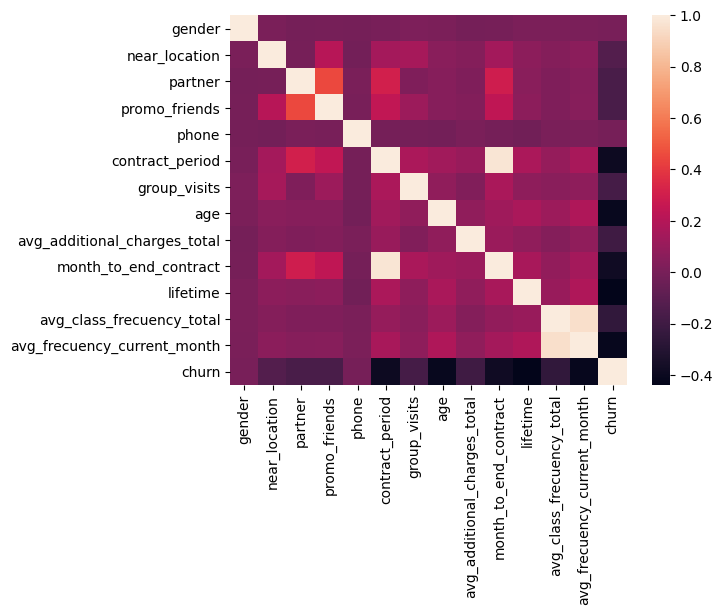

In [13]:
sns.heatmap(data=gym_data.corr())

Nota: los que estan mas relacionados negativamente son location, partner y promociones de amigos.

# Construir un modelo para predecir la cancelación de usuarios

## Modelo regresión logística

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_df, test_df = train_test_split(
    gym_data,
    test_size=0.2,
    random_state=88
)

target = 'churn'
drop_columns = ['gender']

features = [f for f in gym_data.columns if f not in [target] + drop_columns]

In [16]:
from sklearn.linear_model import LogisticRegression
model_logic = LogisticRegression()

In [17]:
model_logic.fit(train_df[features], train_df[target])


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
test_preds_logic = model_logic.predict_proba(test_df[features])[:,1]

In [19]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

thresholds = []
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


In [20]:
for t in np.linspace(0, 1, 21):
    class_preds_logic = test_preds_logic > t
    
    thresholds.append(t)
    accuracy_scores.append(accuracy_score(test_df[target], class_preds_logic))
    recall_scores.append(recall_score(test_df[target], class_preds_logic))
    precision_scores.append(precision_score(test_df[target], class_preds_logic))
    f1_scores.append(f1_score(test_df[target], class_preds_logic))
    
performance_df_logic = pd.DataFrame(data={
    'thresholds': thresholds,
    'accuracy_scores': accuracy_scores,
    'recall_scores': recall_scores,
    'precision_scores': precision_scores,
    'f1_scores': f1_scores,
})

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


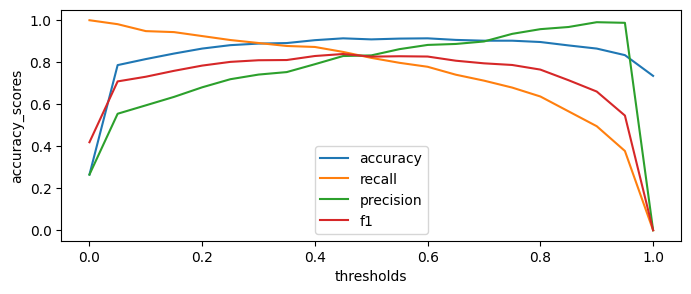

In [21]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=performance_df_logic, x='thresholds', y='accuracy_scores', ax=plt.gca(), label='accuracy')
sns.lineplot(data=performance_df_logic, x='thresholds', y='recall_scores', ax=plt.gca(), label='recall')
sns.lineplot(data=performance_df_logic, x='thresholds', y='precision_scores', ax=plt.gca(), label='precision')
sns.lineplot(data=performance_df_logic, x='thresholds', y='f1_scores', ax=plt.gca(), label='f1')
plt.show()

In [22]:
performance_df_logic

,thresholds,accuracy_scores,recall_scores,precision_scores,f1_scores
0,0.00,0.26500,1.000000,0.265000,0.418972
1,0.05,0.78625,0.981132,0.554667,0.708688
2,0.10,0.81500,0.948113,0.594675,0.730909
3,0.15,0.84125,0.943396,0.634921,0.759013
4,0.20,0.86500,0.924528,0.680556,0.784000
5,0.25,0.88125,0.905660,0.719101,0.801670
6,0.30,0.88875,0.891509,0.741176,0.809422
7,0.35,0.89125,0.877358,0.753036,0.810458
8,0.40,0.90500,0.872642,0.790598,0.829596
9,0.45,0.91375,0.849057,0.829493,0.839161


## Modelo bosque aleatorio.

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=100)

In [24]:
model_rf.fit(train_df[features], train_df[target])

test_preds_rf = model_rf.predict_proba(test_df[features])[:,1]

In [25]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

thresholds = []
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for t in np.linspace(0, 1, 21):
    class_preds_rf = test_preds_rf > t
    
    thresholds.append(t)
    accuracy_scores.append(accuracy_score(test_df[target], class_preds_rf))
    recall_scores.append(recall_score(test_df[target], class_preds_rf))
    precision_scores.append(precision_score(test_df[target], class_preds_rf))
    f1_scores.append(f1_score(test_df[target], class_preds_rf))
    
performance_df_rf = pd.DataFrame(data={
    'thresholds': thresholds,
    'accuracy_scores': accuracy_scores,
    'recall_scores': recall_scores,
    'precision_scores': precision_scores,
    'f1_scores': f1_scores,
})

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


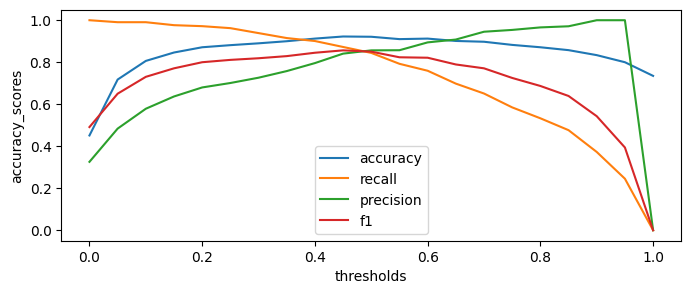

In [26]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=performance_df_rf, x='thresholds', y='accuracy_scores', ax=plt.gca(), label='accuracy')
sns.lineplot(data=performance_df_rf, x='thresholds', y='recall_scores', ax=plt.gca(), label='recall')
sns.lineplot(data=performance_df_rf, x='thresholds', y='precision_scores', ax=plt.gca(), label='precision')
sns.lineplot(data=performance_df_rf, x='thresholds', y='f1_scores', ax=plt.gca(), label='f1')
plt.show()

In [27]:
performance_df_rf

,thresholds,accuracy_scores,recall_scores,precision_scores,f1_scores
0,0.00,0.45125,1.000000,0.325653,0.491309
1,0.05,0.71750,0.990566,0.483871,0.650155
2,0.10,0.80625,0.990566,0.578512,0.730435
3,0.15,0.84625,0.976415,0.636923,0.770950
4,0.20,0.87125,0.971698,0.679868,0.800000
5,0.25,0.88125,0.962264,0.701031,0.811133
6,0.30,0.89000,0.938679,0.726277,0.818930
7,0.35,0.90000,0.915094,0.757812,0.829060
8,0.40,0.91250,0.900943,0.795833,0.845133
9,0.45,0.92250,0.872642,0.840909,0.856481


Nota: Ambos modelos dan resultados muy similares, pero teniendo los resultados finales el modelo de regresion logistica da mejores resultados para cada uno de los clusters. 

# Crear clústeres de usuarios/as

## Estandariza los datos.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df[features])

train_features_scaled = scaler.transform(train_df[features])
test_features_scaled = scaler.transform(test_df[features])

## Dendrograma

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [30]:
data_linkage= linkage(train_features_scaled,method='centroid')

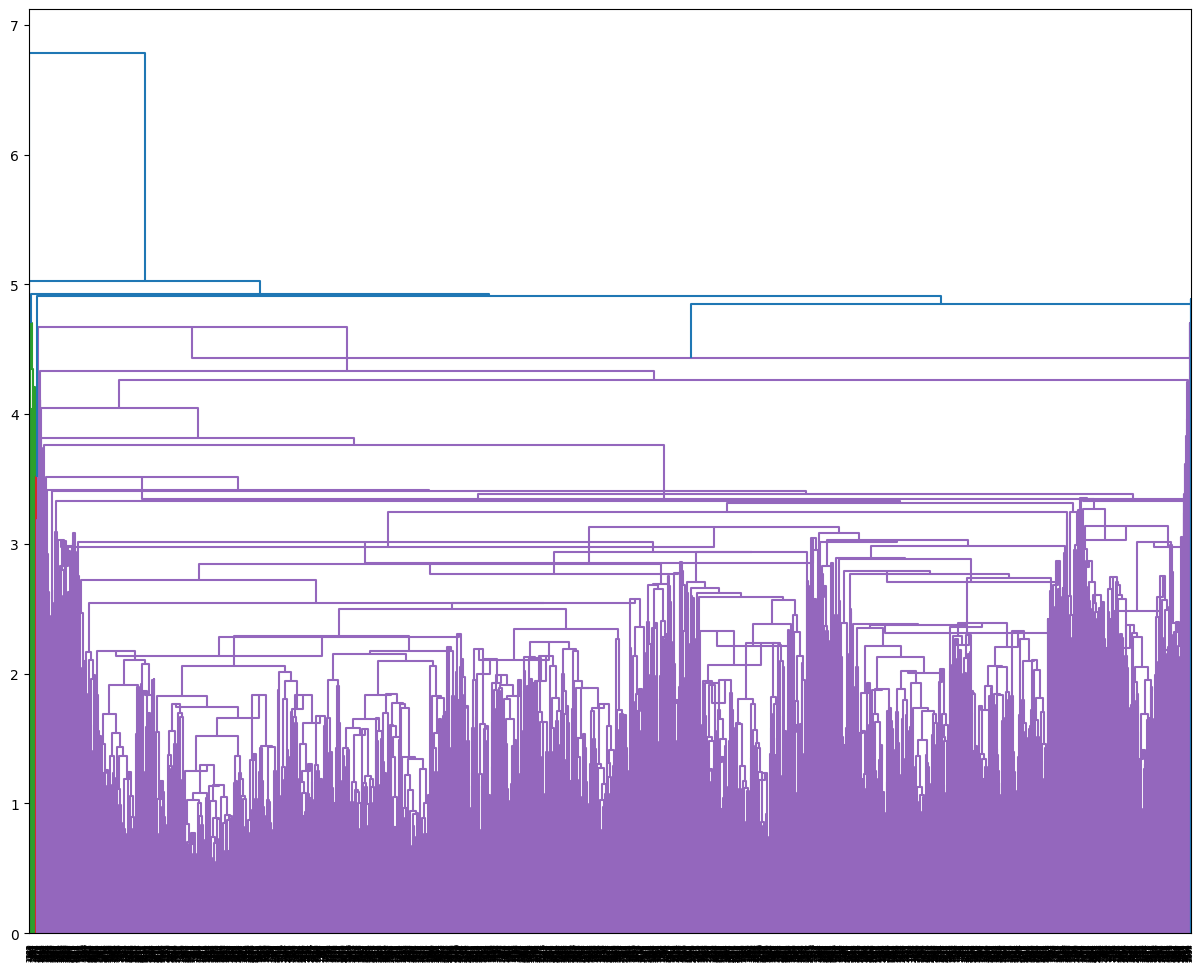

In [31]:
plt.figure(figsize=(15,12))
dendrogram(data_linkage, orientation='top')
plt.show()

## Algortimo K-means

In [32]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters=5)
model_km.fit(train_features_scaled)

KMeans(n_clusters=5)

In [33]:
test_clusters = model_km.predict(test_features_scaled)

In [34]:
test_features_unscaled = scaler.inverse_transform(test_features_scaled)

test_df_scaled = pd.DataFrame(test_features_unscaled)
test_df_scaled.columns = test_df.drop(columns=[target] + drop_columns).columns

test_df_scaled['cluster'] = test_clusters
test_df_scaled['churn'] = test_df['churn']

## Valores medios de característica para los clústeres

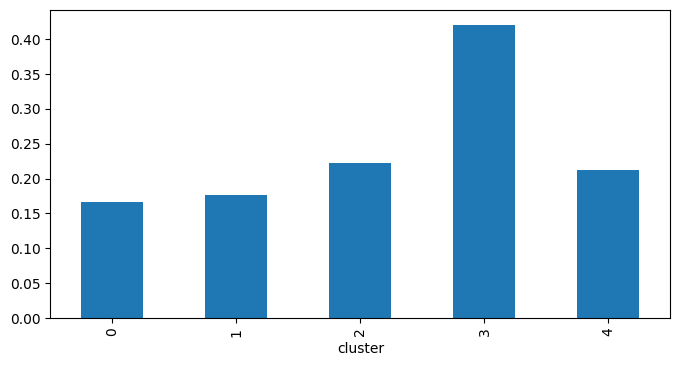

In [35]:
plt.figure(figsize=(8, 4))
test_df_scaled.groupby('cluster')['churn'].mean().plot(kind='bar', ax=plt.gca())
plt.show()

In [36]:
test_df_scaled.groupby('cluster').mean()

,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frecuency_total,avg_frecuency_current_month,churn
cluster,,,,,,,,,,,,,
0,0.812121,0.290909,0.060606,1.0,2.818182,0.418182,29.963636,151.221935,2.593939,4.793939,2.833838,2.808685,0.166667
1,0.868421,0.526316,0.355263,0.0,4.855263,0.447368,29.802632,140.406935,4.684211,4.355263,2.005772,1.876507,0.176471
2,0.903955,0.717514,0.440678,1.0,11.864407,0.519774,29.937853,165.132414,10.807910,4.740113,2.046111,2.025601,0.222222
3,0.939655,0.853448,1.000000,1.0,3.155172,0.405172,29.146552,146.967555,3.017241,3.767241,1.738941,1.682220,0.421053
4,0.669173,0.296992,0.022556,1.0,2.105263,0.259398,27.973684,132.496357,1.939850,2.214286,1.223602,0.955100,0.212766


## Distribuciones de características para los clústeres

In [37]:
test_df['rf_prediction'] = test_preds_logic

/tmp/ipykernel_82/4246979985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rf_prediction'] = test_preds_logic


In [38]:
test_df['group_prediction'] = pd.qcut(test_df['rf_prediction'], q=5, duplicates='drop')
test_df.head()

/tmp/ipykernel_82/3173345344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['group_prediction'] = pd.qcut(test_df['rf_prediction'], q=5, duplicates='drop')


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frecuency_total,avg_frecuency_current_month,churn,rf_prediction,group_prediction
1824,0,1,0,0,1,1,1,27,69.352917,1.0,4,2.103987,2.178061,0,0.030066,"(0.0115, 0.135]"
901,0,1,0,0,1,1,1,31,140.416346,1.0,3,0.835274,0.821356,0,0.152209,"(0.135, 0.736]"
3114,1,1,0,0,1,12,1,27,68.809762,5.0,5,3.735156,3.721445,0,0.000131,"(-0.00099999999879, 0.000586]"
3490,0,1,0,0,1,1,0,25,149.196716,1.0,0,2.152637,1.852379,1,0.945259,"(0.736, 1.0]"
179,1,1,0,0,1,1,0,31,83.267979,1.0,0,1.707727,1.653354,0,0.883652,"(0.736, 1.0]"


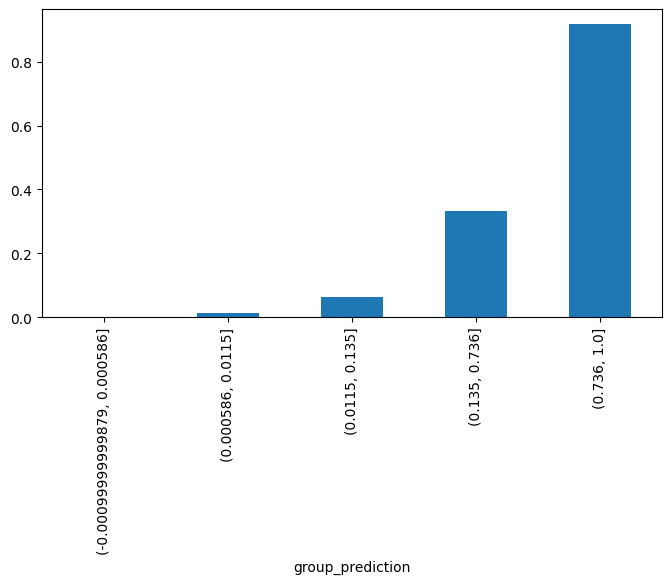

In [39]:
plt.figure(figsize=(8, 4))
test_df.groupby('group_prediction')['churn'].mean().plot(kind='bar', ax=plt.gca())
plt.show()

## Tasa de cancelación para cada clúster

In [40]:
test_df_scaled.groupby('cluster')['churn'].mean()

cluster
0    0.166667
1    0.176471
2    0.222222
3    0.421053
4    0.212766
Name: churn, dtype: float64

# Conclusiones

- Se deben implementar estrategias para el primer y segundo cluster ya que son los que tienen el pocetaje de cancelacion mas alto.
- Para el cluster dos que son refieridos por amigos, se puede genenrar un mayor incentivo con este programa para motivarlos a aumentar la cantidad de visitas, generando descuentos adicionales de los otros servicios del gimnasio, ya que son los que mas gastan, podria ser unas tiqueteras especiales. 
- Se podria realizar descuentos especiales a las las personas menores de 30 años, con planes mas economicos y con flexibilidad con periodos de menos de un año.
- Generar planes de fidelizacion para aquellos que tienen mas de 6 meses asistiendo mas de dos veces por semanas, con descuento especiales. 
